<a href="https://colab.research.google.com/github/antiantono/bts-cda-tareas/blob/main/assignments/Session2_LogisticRegression_Exercise_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis


**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/antiantono/bts-cda-2020/main/Session_2/banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [ ]:
data.shape

(41188, 21)

In [ ]:
# check numerics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
# check categoricals
data.describe(exclude=np.number).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [ ]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [ ]:
# count before grouping
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
# reassign all 'basic.xx' into one 'basic' group
data.education.replace(to_replace=r'basic.\w\w', value='basic', regex=True, inplace=True)

In [ ]:
# count after grouping
data.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

##### Analyse the distribution of the target variable

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


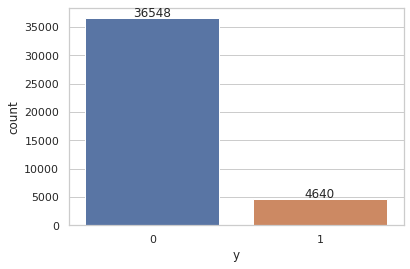

In [ ]:
ax = sns.countplot(data.y)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 250,
            '{:1.0f}'.format(height),
            ha="center") 

In [ ]:
ytable = pd.DataFrame(data.value_counts(data.y), columns=['count']).reset_index()
ytable['perc'] = round(100 * ytable['count'] / ytable['count'].sum(), 2)
ytable

,y,count,perc
0,0,36548,88.73
1,1,4640,11.27


##### What can we observe about the distribution of the target variable

*There is a huge class imbalance, almost 9 to 1. The data needs to be weighted, or the minor class needs to be upsampled.*

##### Observe how the different numeric variables behave for the 2 classes

In [ ]:
ysplit = data.groupby(by='y', axis=0).mean()
ysplit

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
# Check the relative difference between the two classes
ysplit.loc['diff'] = ysplit.loc[1] - ysplit.loc[0]
ysplit

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
diff,1.001961,332.346357,-0.581361,-192.078317,0.360299,-1.482324,-0.249371,0.803312,-1.688356,-81.050609


In [ ]:
# Use index vs reference (class=0) to make the difference more comparable across various features
ysplit.loc['index'] = abs(100* ysplit.loc['diff'] / ysplit.loc[0])
ysplit

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
diff,1.001961,332.346357,-0.581361,-192.078317,0.360299,-1.482324,-0.249371,0.803312,-1.688356,-81.050609
index,2.510477,150.488645,22.079085,19.517895,272.182542,595.608654,0.266411,1.978938,44.296470,1.565842


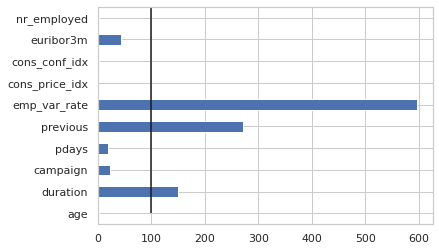

In [ ]:
# Visualize to check the biggest differences
ysplit.loc['index'].plot(kind='barh')
_= plt.vlines(x=100, ymin=0, ymax=len(ysplit.columns))

**OBSERVATION**

**There are three numerical features that make the most difference between the two classes (1= customers with term deposit, 0= customers without). These are:**
* ```emp_var_rate``` (employment variation rate)
* ```previous``` (number of previous contacts)
* ```duration``` (duration of the last contact)

##### Analyse other variables - Make some plots and discuss them

- **Job title**

In [ ]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

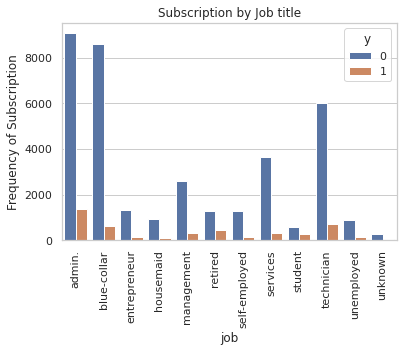

In [ ]:
sns.countplot(data=data, x='job', hue='y', order=sorted(data.job.unique().tolist()))
_= plt.title('Subscription by Job title')
_= plt.ylabel('Frequency of Subscription')
_= plt.xticks(rotation=90)

In [ ]:
by_job = pd.crosstab(data.job, data.y)
by_job

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


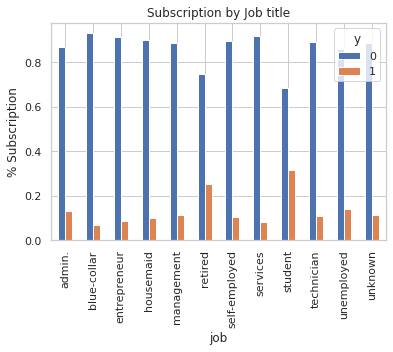

In [ ]:
by_job.div(by_job.sum(axis=1), axis=0).plot(kind='bar')
_= plt.title('Subscription by Job title')
_= plt.ylabel('% Subscription')

**OBSERVATION**

**The proportion of customers who subscribe to term deposit is highest among students (a relatively smaller group) and retirees. Still, across most groups there isn't too big difference in the subscription rate.**

- **Marital status**

In [ ]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
by_marital = pd.crosstab(data.marital, data.y)
by_marital

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


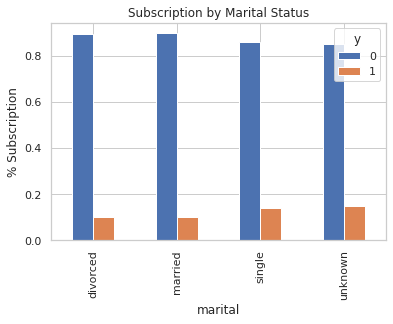

In [ ]:
by_marital.div(by_marital.sum(axis=1), axis=0).plot(kind='bar')
_= plt.title('Subscription by Marital Status')
_= plt.ylabel('% Subscription')

**OBSERVATION**

**The proportion of customers who subscribe to term deposit doesn't vary that much across different categories of marital status.**

- **Education**

In [ ]:
data.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
by_educ = pd.crosstab(data.education, data.y)
by_educ

y,0,1
education,,
basic,11424,1089
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


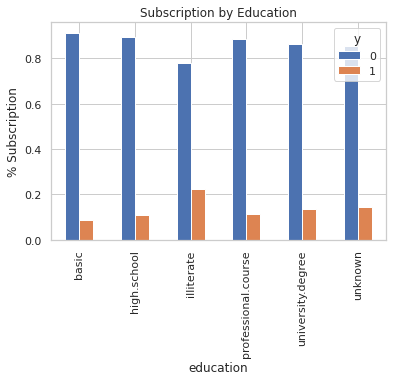

In [ ]:
by_educ.div(by_educ.sum(axis=1), axis=0).plot(kind='bar')
_= plt.title('Subscription by Education')
_= plt.ylabel('% Subscription')

**OBSERVATION**

**The proportion of customers who subscribe to term deposit doesn't vary hugely across different levels of education, if a little higher among illiterates (this is rather counter-intuitive).**

- **Day of Week**

In [ ]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
by_day = pd.crosstab(data.day_of_week, data.y)
by_day

y,0,1
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


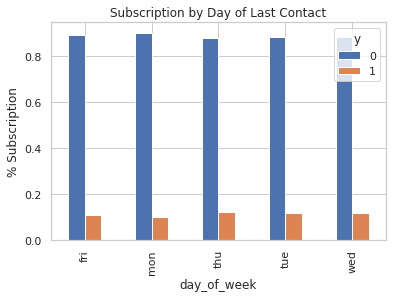

In [ ]:
by_day.div(by_day.sum(axis=1), axis=0).plot(kind='bar')
_= plt.title('Subscription by Day of Last Contact')
_= plt.ylabel('% Subscription')

**OBSERVATION**

**The day of last contact doesn't have any bearing to proportion of customers who subscribe to term deposit.**

- **Month**

In [ ]:
by_month = pd.crosstab(data.month, data.y)
by_month

y,0,1
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


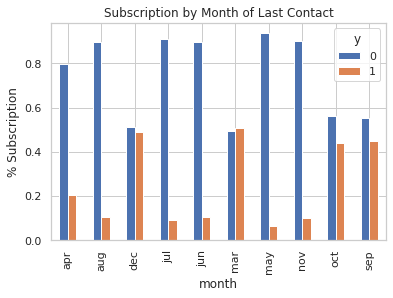

In [ ]:
by_month.div(by_month.sum(axis=1), axis=0).plot(kind='bar')
_= plt.title('Subscription by Month of Last Contact')
_= plt.ylabel('% Subscription')

**OBSERVATION**

**There is *some* variation of subscription rate across different months of the year, but there isn't an obvious pattern through the year (subscriptions are highests in Mar, Sep, Oct, Dec)**

- **poutcome**

In [ ]:
by_prev = pd.crosstab(data.poutcome, data.y)
by_prev

y,0,1
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


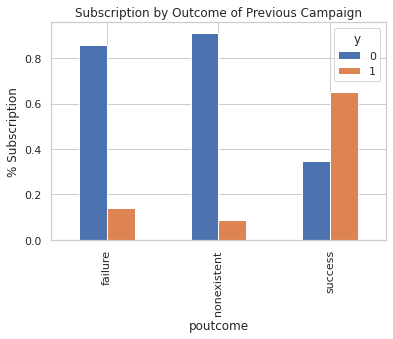

In [ ]:
by_prev.div(by_prev.sum(axis=1), axis=0).plot(kind='bar')
_= plt.title('Subscription by Outcome of Previous Campaign')
_= plt.ylabel('% Subscription')

**OBSERVATION**

**There is a clear association between the outcome of the last campaign and  term deposit subscription: if the last campaign was succesful, customers are more likely to sign up for term deposit.**

**It is worth including the** 
```outcome of the last campaign``` **as a feature in the model.**

### Create dummy variables

In [ ]:
# Isolate the variable to be converted to dummies (poutcome)
poutcome = data.poutcome
poutcome = pd.get_dummies(poutcome, prefix='poutcome', drop_first=False)
poutcome.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [ ]:
# Join the data frames
data = pd.concat([data, poutcome], axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,1


### Implement the Logistic Regression Model

##### Prepare the dataset for training

**NOTES**

**Chosen features:** 
* ```emp_var_rate``` (employment variation rate)
* ```previous``` (number of previous contacts)
* ```duration``` (duration of the last contact)
* ```poutcome_nonexistent``` (dummy; outcome of previous campaign)
* ```poutcome_success``` (dummy; outcome of previous campaign)

**The first dummy variable** ```poutcome_failure``` **is not included, so we use (k-1) dummy features to avoid redundancy.**

In [ ]:
# Final dataset
data_final = data[['emp_var_rate', 'previous', 'duration', 'poutcome_nonexistent', 'poutcome_nonexistent', 'y']]
data_final.head()

,emp_var_rate,previous,duration,poutcome_nonexistent,poutcome_nonexistent,y
0,1.4,0,210,1,1,0
1,-0.1,0,138,1,1,0
2,-1.7,2,339,0,0,1
3,-1.8,0,185,1,1,0
4,-2.9,1,137,0,0,1


In [ ]:
# Set of features
X = data_final.drop(columns='y', axis=1)

# Target
y = data_final.y

In [ ]:
from sklearn.model_selection import train_test_split

# Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 5), (12357, 5), (28831,), (12357,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


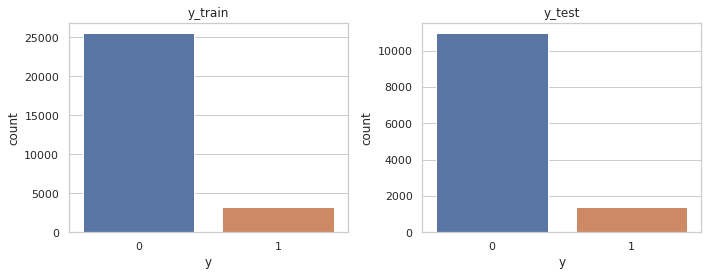

In [ ]:
# Just a reminder - we still have unbalanced classes!
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121); sns.countplot(y_train); plt.title('y_train')    
plt.subplot(122); sns.countplot(y_test); plt.title('y_test')
plt.tight_layout()

In [ ]:
# Import model and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# Create model instance with default settings
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [ ]:
# Predict
y_pred = lr.predict(X_test)

# Evaluate
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))

Accuracy of logistic regression classifier on test set: 0.90


**Note: my result is slightly different vs the reference (91%); maybe I included different features.**

##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET


**EXPLANATION**

**The `accuracy` metric looks at the overall correct prediction across all classes being predicted.** 

**In the case of an unbalanced dataset (like ours), the high accuracy may be attributed to a lot of the majority class being predicted correctly, and overlooks model performance among the minority class. Our model may not be so good at predicting the minority class, simply because it hasn't seen enough of this class compared to the majority class!**

**To check how the model really performs, we need to look at both the majority and minority classes, and evaluate other metrics such as:**
* **`recall` (how many of all true cases are predicted correctly)**
* **`precision` (out of the predicted cases, how many are correct)**
* **`f1 score` (combination of recall and precision)**





The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

In [ ]:
# Confusion matrix, counts
print("Confusion Matrix\n", metrics.confusion_matrix(y_test, y_pred))

# Normalized on true cases (= recall)
print("\nRecall Matrix\n", metrics.confusion_matrix(y_test, y_pred, normalize='true'))

# Normalized on predicted cases (= precision)
print("\nPrecision Matrix\n", metrics.confusion_matrix(y_test, y_pred, normalize='pred'))

Confusion Matrix
 [[10724   257]
 [  998   378]]

Recall Matrix
 [[0.97659594 0.02340406]
 [0.7252907  0.2747093 ]]

Precision Matrix
 [[0.91486095 0.40472441]
 [0.08513905 0.59527559]]


**Is our model obtaining good results or is it failing in some specific case?**

**ANSWER**

**As we can see in the above confusion matrices, our model is much better at predicting the majority class i.e. those who did not subscribe to term deposit. We reached a ```recall``` of 98% and ```precision``` of 91% for this group.**

**On the other hand, the performance among the minority class i.e. those who sign up for term deposit is poorer : a ```recall``` of only 27% (!) and ```precision``` of 60% for this group.**

**If what we care about is predicting subscription i.e. positive classes, then we'll need to improve the model substantially.**




##### Compute other metrics using classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10981
           1       0.60      0.27      0.38      1376

    accuracy                           0.90     12357
   macro avg       0.76      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

**ANSWER**

**In our case, if we wrongly predict someone to be uninterested in term deposit, it could be a lost opportunity -- that person may not be followed up with better marketing efforts.**

**In other fields such as medicine or fraud detection, the impact can be worse -- failure to detect a disease can lead to the patient being untreated, and failure to detect a fraud can result in the business losing money.**


##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

**Note: We will use the same X_train and y_train data from before**

In [ ]:
X_train.columns

Index(['emp_var_rate', 'previous', 'duration', 'poutcome_nonexistent',
       'poutcome_nonexistent'],
      dtype='object')

In [ ]:
len(X_train), len(y_train)

(28831, 28831)

In [ ]:
# The imbalanced data
y_train.value_counts()

0    25567
1     3264
Name: y, dtype: int64

##### Apply SMOTE to generate synthetic data

In [ ]:
# Import & initiate SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In [ ]:
# Apply oversampling ONLY ON training data
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Tidy up into dataframes
os_data_X = pd.DataFrame(os_data_X, columns= X_train.columns)
os_data_y = pd.DataFrame(os_data_y, columns= ['y'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


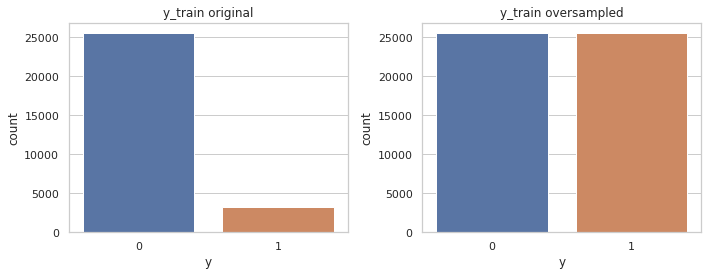

In [ ]:
# Now our classes have been balanced in the new dataset generated with SMOTE
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121); sns.countplot(y_train); plt.title('y_train original')
plt.subplot(122); sns.countplot(os_data_y['y']); plt.title('y_train oversampled')
plt.tight_layout()

In [ ]:
# Check the counts of training data before and after SMOTE
print("ORIGINAL DATA", 
      "\nTotal length:  ", len(y_train),
      "\nClass sizes:", 
      "\tNo subscription =", sum(y_train == 0), "\tSubscription =", sum(y_train == 1),
      "\nProportion:", 
      "\tNo subscription = {:.0f}%".format(100*sum(y_train == 0)/len(y_train)),
      "\t\tSubscription = {:.0f}%".format(100*sum(y_train == 1)/len(y_train)))
print("")
print("OVERSAMPLED DATA", 
      "\nTotal length:  ", len(os_data_y),
      "\nClass sizes:", 
      "\tNo subscription =", len(os_data_y[os_data_y['y']==0]), "\tSubscription =", len(os_data_y[os_data_y['y']==1]),
      "\nProportion:", 
      "\tNo subscription = {:.0f}%".format(100*len(os_data_y[os_data_y['y']==0])/len(os_data_y)),
      "\t\tSubscription = {:.0f}%".format(100*len(os_data_y[os_data_y['y']==1])/len(os_data_y)))

ORIGINAL DATA 
Total length:   28831 
Class sizes: 	No subscription = 25567 	Subscription = 3264 
Proportion: 	No subscription = 89% 		Subscription = 11%

OVERSAMPLED DATA 
Total length:   51134 
Class sizes: 	No subscription = 25567 	Subscription = 25567 
Proportion: 	No subscription = 50% 		Subscription = 50%


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [ ]:
os_y_count = pd.DataFrame(os_data_y.value_counts(), columns=['count']).sort_values(by= 'y').reset_index()
os_y_count['perc'] = os_y_count['count'].div(sum(os_y_count['count']), axis=0)
os_y_count

,y,count,perc
0,0,25567,0.5
1,1,25567,0.5


They are prefectly distributed!!

##### Implement the model

In [ ]:
# Split training and test from oversampled data
os_X_train, os_X_test, os_y_train, os_y_test = train_test_split(os_data_X, os_data_y, test_size=0.30, random_state= 0)

os_X_train.shape, os_X_test.shape, os_y_train.shape, os_y_test.shape

((35793, 5), (15341, 5), (35793, 1), (15341, 1))

In [ ]:
# Create model instance with default settings
lr = LogisticRegression()

# Fit the model
lr.fit(os_X_train, os_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [ ]:
# Predict
os_y_pred = lr.predict(os_X_test)

# Evaluate
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(os_y_test, os_y_pred)))

Accuracy of logistic regression classifier on test set: 0.84


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [ ]:
# Confusion matrix, counts
print("Confusion Matrix\n", metrics.confusion_matrix(os_y_test, os_y_pred))

# Normalized on true cases (= recall)
print("\nRecall Matrix\n", metrics.confusion_matrix(os_y_test, os_y_pred, normalize='true'))

# Normalized on predicted cases (= precision)
print("\nPrecision Matrix\n", metrics.confusion_matrix(os_y_test, os_y_pred, normalize='pred'))

Confusion Matrix
 [[6235 1431]
 [1067 6608]]

Recall Matrix
 [[0.81333159 0.18666841]
 [0.1390228  0.8609772 ]]

Precision Matrix
 [[0.85387565 0.17800721]
 [0.14612435 0.82199279]]


Analysing the confusion matrix we can observe that now our model is able to predict quite well both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [ ]:
print(classification_report(os_y_test, os_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7666
           1       0.82      0.86      0.84      7675

    accuracy                           0.84     15341
   macro avg       0.84      0.84      0.84     15341
weighted avg       0.84      0.84      0.84     15341



The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

**NOTES ON MODEL WITH OVERSAMPLED TRAINING DATA**

**As we can see in the above confusion matrices, our model is now showing much better performance among the minority class i.e. those with term subscriptions. We have improved ```recall``` from 27% to 86% (wow!) and ```precision``` from 60% to 82%.**

**This is a better model to be used for our purpose of predicting term subscription, so we will stick to this second model generated with oversampled training data for more balanced classes.**

## BONUS MODEL
**I'm curious to see what happens if we don't oversample the training data, but simply use the `class_weight` parameter to weight the data while fitting the model. According to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the 'balanced' mode uses class proportions in the training data to adjust the weights inversely proportional to class frequencies.**

In [ ]:
# Create model instance with default settings
lrbl = LogisticRegression(class_weight='balanced')

# Fit the model
lrbl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict
bl_y_pred = lrbl.predict(X_test)

In [ ]:
# Result
print(classification_report(y_test, bl_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     10981
           1       0.37      0.85      0.52      1376

    accuracy                           0.82     12357
   macro avg       0.68      0.84      0.71     12357
weighted avg       0.91      0.82      0.85     12357



**NOTES ON MODEL WITH WEIGHTED TRAINING DATA**

**It turns out adjusting the model instance with a weighting parameter does help improve recall significantly, to a similar level of the result from oversampled data (from 27% to 85%). However, the precision for the minority class dropped -- so this doesn't seem to be a sufficient approach.**